# LIBRERÍAS

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [41]:
ruta=("C:\Proyecto-API-Hoteles/")
df=pd.read_csv(ruta+"Data/hotel_bookings.csv")

# INFORMACIÓN DEL DATASET

In [42]:
#Número de filas y columnas
print(df.shape) #(119390, 32)

(119390, 32)


In [43]:
#Información de columnas y tipo de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [44]:
#Estadístcos descriptivos de variables numéricas.
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [45]:
#10 primeras filas
print(df.head(10))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                       

# LIMPIEZA DE DATOS

In [46]:
#Revisión de variables faltantes
#Ver que variables faltantes.
hotel_bookings_nan=df[df.isna().any(axis=1)]
hotel_bookings_nan #[119173 rows x 32 columns]
#119390-119173= 217 filas que no tienen variables faltantes

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [47]:
#Que columnas hay variables faltantes
df.isna().sum() #children= 4, country= 488 , agent= 16340, company= 112593

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [48]:
#Eliminamos la columna "company" por exceso de NAs y eliminamos columnas que no nos interesen en el modelo
col_drop=['company','reservation_status','reservation_status_date','is_canceled','assigned_room_type','arrival_date_year']
df=df.drop(columns=col_drop)

In [49]:
#Cuantas filas y columnas tenemos una vez eliminadas.
df.shape 

(119390, 26)

In [50]:
#Rellenamos las variables faltantes por 0
df['agent']=df['agent'].fillna(0)

df['children']=df['children'].fillna(0)

In [51]:
#Rellenamos con la moda.
df['country']= df['country'].fillna(df['country'].mode()[0])

In [52]:
#Revisamos si hay filas duplicados.
duplicados= df.duplicated().sum()
print(duplicados) #hay 32020 duplicados

33556


In [53]:
#los eliminamos para obtener un mejor resultado en el modelo.
df=df.drop_duplicates()

## Creación de nuevas variables


Creamos nuevas variables para que simplificar el entrenamiento del modelo

In [54]:
df['total_people'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# IDENTIFICACIÓN DE OUTLIERS

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
save_grafico=(ruta+"Gráficos")

In [57]:
#Se puede ver la diferencia abismal entre el 50%,75% y el max. La diferencia es extremádamente grande.
print(df['adr'].describe())

count    85834.000000
mean       106.701626
std         55.212351
min         -6.380000
25%         72.250000
50%         99.000000
75%        134.850000
max       5400.000000
Name: adr, dtype: float64


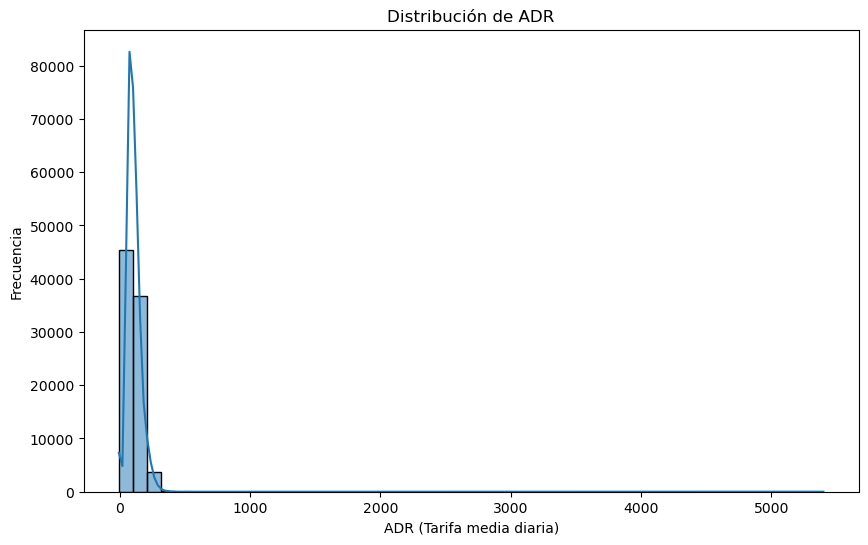

In [58]:
#Histograma
plt.figure(figsize=(10,6))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title("Distribución de ADR")
plt.xlabel("ADR (Tarifa media diaria)")
plt.ylabel("Frecuencia")
plt.savefig(save_grafico+'/Distribución_ADR.png')
plt.show()
plt.close() 

**Conclusión:** Los valores ADR son muy altos pero con poca frecuencia (Evidencia de outliers)

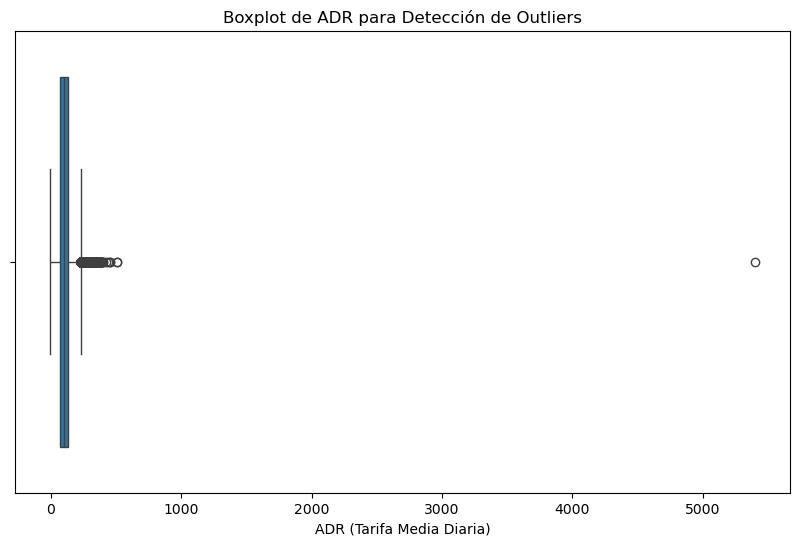

In [59]:
#Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['adr'])
plt.title('Boxplot de ADR para Detección de Outliers')
plt.xlabel('ADR (Tarifa Media Diaria)')
plt.savefig(save_grafico+'/Boxplot_ADR.png')
plt.show() 

**Conclusión:** Se puede ver claramente que hay una gran cantidad de puntos a la derecha de la caja y su bigote. Por lo que visualmente y estadísticamente confirmamos la existencia de muchos outliers en "ADR.

Eliminamos los outliers más alejados del resto, para obtener un mejor modelo.

In [60]:
df = df[(df['adr'] < 5000) & (df['adr'] > 0)]

Comprobamos que ya no hay más outliers

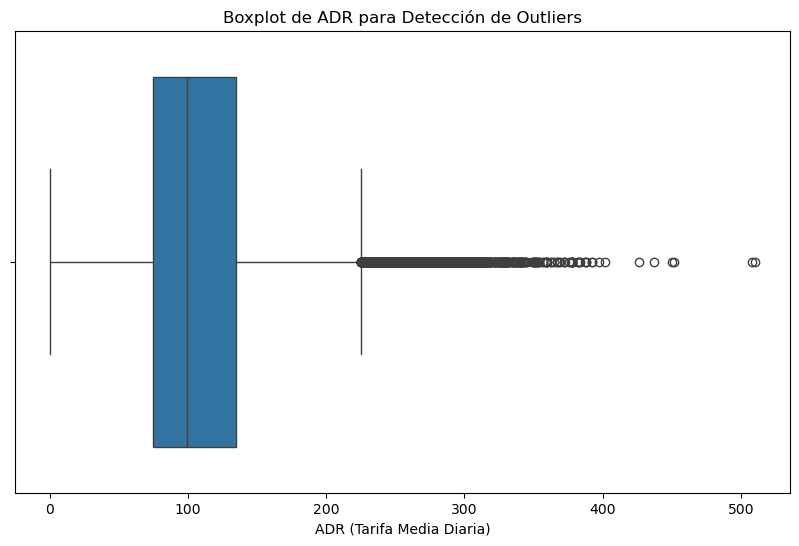

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['adr'])
plt.title('Boxplot de ADR para Detección de Outliers')
plt.xlabel('ADR (Tarifa Media Diaria)')
plt.savefig(save_grafico+'/Boxplot_ADR.png')
plt.show() 

Vemos que quedan más outliers por eliminar, por lo que los eliminamos también, para mejorar el modelo.

In [62]:
df = df[(df['adr']<420)&(df['adr']>0)]

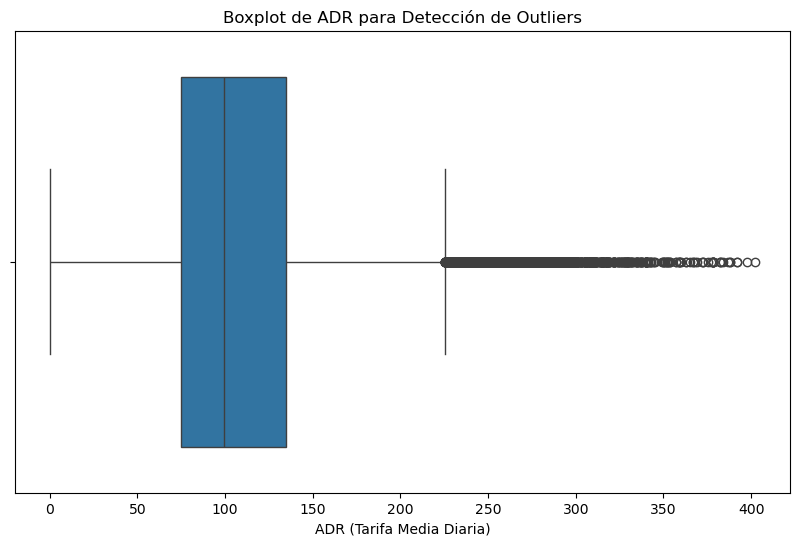

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['adr'])
plt.title('Boxplot de ADR para Detección de Outliers')
plt.xlabel('ADR (Tarifa Media Diaria)')
plt.savefig(save_grafico+'/Boxplot_ADR.png')
plt.show() 

Ahora podemos ver que están más pegados, por lo que los dejamos para que el entrenamiento del modelo. Esto es porque puede haber hoteles en el que se incrementen los precios dependiendo de la temporada, habitación,etc.

# GUARDAMOS DATOS EN SQLITE

In [64]:
import sqlite3
import os

In [65]:
base_datos=(ruta+"Data/")
conexion=sqlite3.connect(base_datos+"hotel_bookings_clean.db")
df.to_sql("hotel_bookings_clean",conexion, if_exists="replace",index=False)
conexion.close()